# IBCSO v2 data coverage
**Description:** International Bathymetric Chart of the Southern Ocean Version 2 data coverage. 

**Dataset:** 

Dorschel, Boris, Laura Hehemann, Sacha Viquerat, Fynn Warnke, Simon Dreutter, Yvonne Schulze Tenberge, Daniela Accettella, et al. “The International Bathymetric Chart of the Southern Ocean Version 2 (IBCSO V2).” PANGAEA, 2022. https://doi.org/10.1594/PANGAEA.937574.

**Associated paper:** 

Dorschel, Boris, Laura Hehemann, Sacha Viquerat, Fynn Warnke, Simon Dreutter, Yvonne Schulze Tenberge, Daniela Accettella, et al. “The International Bathymetric Chart of the Southern Ocean Version 2.” Scientific Data 9, no. 1 (December 2022): 275. https://doi.org/10.1038/s41597-022-01366-7.


In [1]:
%%capture
%load_ext autoreload
%autoreload 2


from polartoolkit import fetch, maps, regions

In [2]:
points_gdf, polygons_gdf = fetch.ibcso_coverage(
    # available options
    region=regions.antarctica,
)

In [3]:
points_gdf.head()

,dataset_name,dataset_tid,weight,geometry,easting,northing
103,NBP95_1.xyz,10,10,POINT (196516.917 -2796367.56),196516.917232,-2.796368e+06
103,NBP95_1.xyz,10,10,POINT (196481.198 -2796007.306),196481.198017,-2.796007e+06
103,NBP95_1.xyz,10,10,POINT (195407.58 -2785946.734),195407.580459,-2.785947e+06
103,NBP95_1.xyz,10,10,POINT (195363.697 -2785590.562),195363.696851,-2.785591e+06
103,NBP95_1.xyz,10,10,POINT (195322.875 -2785222.144),195322.874891,-2.785222e+06


In [4]:
polygons_gdf.head()

,dataset_name,dataset_tid,weight,geometry
718,NBP9909.xyz,11,20,"POLYGON ((-7122.412 -2488059.704, -6561.11 -24..."
847,NBP0305A.xyz,11,25,"POLYGON ((141581.785 -2793491.652, 141616.483 ..."
886,OGS_TransitRSMacq.xyz,11,25,"POLYGON ((187495.264 -2646111.108, 190079.294 ..."
547,ANA06A.xyz,11,25,"POLYGON ((197463.987 -2598392.278, 200575.641 ..."
544,NBP0209.xyz,11,25,"POLYGON ((-424.548 -2406206.571, -423.528 -240..."


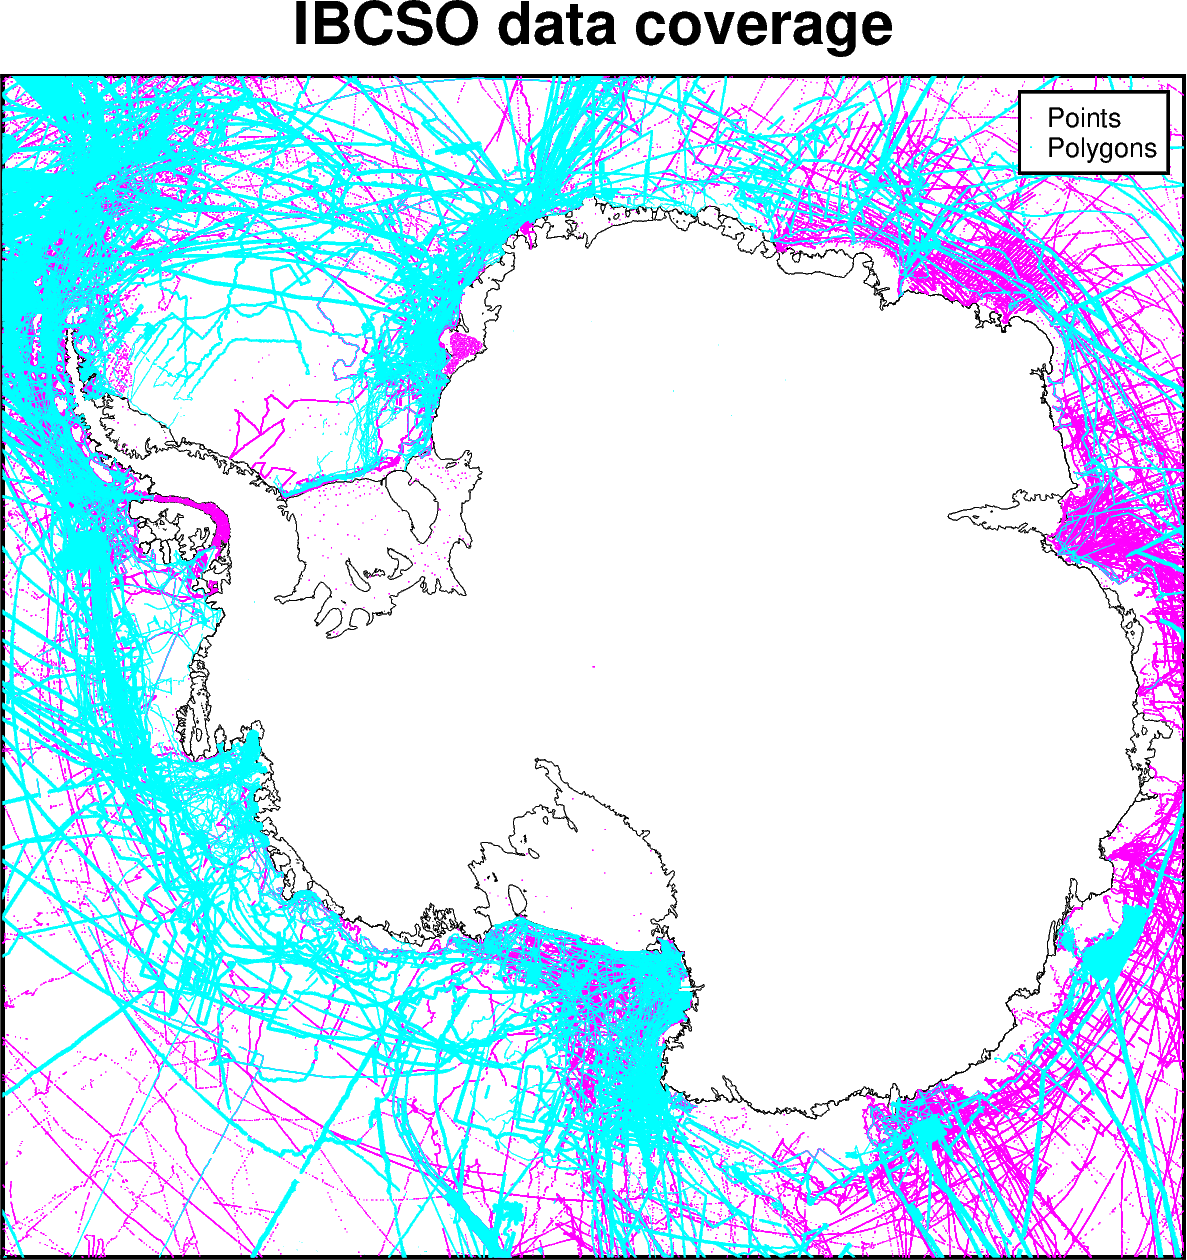

In [5]:
fig = maps.basemap(
    region=regions.antarctica,
    coast=True,
    coast_pen="0.1,black",
    title="IBCSO data coverage",
    hemisphere="south",
)
# plot the points
fig.plot(
    data=points_gdf[::10],  # decrease the number of points to plot
    style="p",
    fill="magenta",
    label="Points",
)

# plot the polygons
fig.plot(
    data=polygons_gdf,
    close=True,
    fill="cyan",
    label="Polygons",
)

fig.legend()

fig.show(dpi=200)